In [81]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
file_path = '/content/drive/MyDrive/ML/Classification/bmi_train.csv'

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip().str.lower()
required_columns = {'gender', 'height', 'weight', 'index'}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Your CSV must contain the following columns: {required_columns}")

In [83]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

scaler = StandardScaler()
df[['height', 'weight']] = scaler.fit_transform(df[['height', 'weight']])


In [84]:
X = df[['gender', 'height', 'weight']]
y = df['index']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [86]:
test_score = model.score(X_test, y_test)
print(f"Model accuracy on test data: {test_score:.2f}")

Model accuracy on test data: 0.63


In [87]:
y_pred = model.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📊 Accuracy: {accuracy:.2%}")
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))


📊 Accuracy: 63.33%

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         6
           2       0.32      0.53      0.40        15
           3       0.00      0.00      0.00        15
           4       0.62      0.60      0.61        30
           5       0.83      1.00      0.91        50

    accuracy                           0.63       120
   macro avg       0.30      0.36      0.32       120
weighted avg       0.54      0.63      0.58       120



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


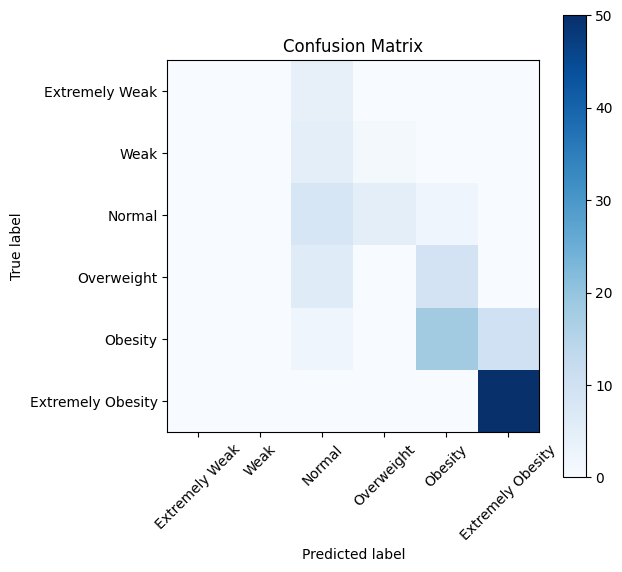

In [89]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(6), ['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extremely Obesity'], rotation=45)
plt.yticks(np.arange(6), ['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extremely Obesity'])
plt.show()

In [90]:
le = LabelEncoder()
le.fit(['Male', 'Female'])

print("Gender classes:", le.classes_)

Gender classes: ['Female' 'Male']


In [91]:
print("\n📥 Enter your information:")
gender_input = input("Gender (male/female): ").capitalize()
if gender_input not in le.classes_:
    print(f"Invalid input! Please enter one of the following: Male, Female")
else:
    gender = le.transform([gender_input])[0]

    height = float(input("Your height (cm): "))
    weight = float(input("Your weight (kg): "))

    height_scaled = scaler.transform([[height, weight]])[0][0]
    weight_scaled = scaler.transform([[height, weight]])[0][1]

    user_input = np.array([[gender, height_scaled, weight_scaled]])
    prediction = model.predict(user_input)[0]

    labels = ['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extremely Obesity']
    print(f"\n🧠 Prediction result: {labels[prediction]}")



📥 Enter your information:
Gender (male/female): male
Your height (cm): 185
Your weight (kg): 90

🧠 Prediction result: Obesity


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [64]:
user_input = np.array([[gender, height, weight]])
prediction = model.predict(user_input)[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [65]:
labels = ['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extremely Obesity']

print(f"\n🧠 Prediction result: {labels[prediction]}")


🧠 Prediction result: Overweight
